# El método de Euler mejorado aplicado a sistemas de EDOs

<ul id="top">
<li><a href="#1-Implementación-del-método-de-Euler-mejorado">1-Implementación del método de Euler mejorado</a></li>
<li><a href="#2-Error-de-los-métodos-de-Euler-y-Euler-mejorado">2-Error de los métodos de Euler y Euler mejorado</a></li>
      <ul>
        <li><a href="#Problema-Robot-Móvil">Problema Robot Móvil</a></li>
        <li><a href="#Estudio-del-Error">Estudio del Error</a></li>
      </ul>
<li><a href="#Valoración">Valoración</a></li>
</ul>  

In [1]:
using LinearAlgebra
using Plots

┌ Info: Recompiling stale cache file /Users/ander/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


## 1-Implementación del método de Euler mejorado

Queremos simular numéricamente la evolución de sistemas modelados por 
ecuaciones diferenciales ordinarias (EDOs) de dimensión $d\geq 1$ de la forma

<a id='Edo-Compacta'></a>
\begin{equation*}
\frac{d}{dt} u = f(t,u,p). \hspace{10em} \tag{1}
\end{equation*}

donde $u =(u^1,\ldots,u^d) \in \mathbb{R}^d$ es el _vector de estado_ del sistema, y $p \in \mathbb{R}^m$ es un vector de parámetros constantes del sistema.

Sabemos que, fijado el vector $p$ de parámetros constantes, 
dados $t_0 \in \mathbb{R}$ y $u_0 =(u^1_0,\ldots,u^d_0) \in \mathbb{R}^d$, existe una única solución $u(t)$ de [(1)](#Edo-Compacta) que satisfaga la condición inicial

<a id='Cond-Ini'></a>
\begin{equation*}
  u(t_0)=u_0. \hspace{12em} \tag{2}
\end{equation*}

En la práctica, nos interesará calcular de forma aproximada la solución $u(t)$ para un cierto intervalo temporal $t \in [t_0,T]$. Se aproximará dicha solución en una discretización del tiempo obtenida de dividir el intervalo temporal $[t_0,T]$ en $n$ partes iguales. Es decir,  se tomará los valores discretos del tiempo $t_0,t_1,t_2,\ldots,t_{n-1},t_n=T$, donde $t_k=t_{0}+k h$, con $h=(T-t_0)/n$, y se calcularán las aproximaciones 
$u_k =(u^1_k,\ldots,u^d_k) \approx u(t_k)$ para $k=0,1,\ldots,n$.

### 1.1- Ejercicio

Para realizar los ejercicios de simulación que siguen, se debe primeramente implementar el método de Euler mejorado en Julia. Se definirá una función (que llamaremos EulerMejorado) que toma como argumentos de entrada $u0, t0, T, n, f, p, m$.

El significado de los primeros seis argumentos de entrada de dicha función se puede deducir de las consideraciones de arriba. Como argumento de entrada adicional, se considerará un entero positivo $m$ cuyo significado se explicará a continuación, y cuyo valor por defecto será $m=1$. (Es decir, si cuando se invoca a la función EulerMejorado, se dan como argumentos de entrada $u0, t0, T, n, f, p$, se considerará que $m=1$.

Si $m=1$, ello indicará que para cada $j=1,\ldots,n$, se obtendrá la aproximación $u_j \approx u(t_j)$ aplicando un paso de longitud $h=(T-t_0)/n$ del método de Euler mejorado. En cambio, si $m>1$, cada aproximación $u_j \approx u(t_j)$ se obtendrá aplicando $m$ pasos de longitud $h=(T-t_0)/(n m)$ del método de Euler mejorado. Esto último será conveniente si sólo queremos los resultados para $n+1$ tiempos, pero la aproximación obtenida con el método de Euler mejorado con $h=(T-t_0)/n$ no es suficientemente precisa.



El argumento de entrada $f$ es el nombre de una función previamente definida, tal que dados $t \in \mathbb{R}$, un vector $u \in \mathbb{R}^d$, y un vector de parámetros $p\in \mathbb{R}^m$,
devuelve un vector $f(t,u,p) \in \mathbb{R}^d$. Dicha función determina un sistema de EDOs de la forma [(1)](#Edo-Compacta).

La función EulerMejorado debe devolver como argumento de salida una matriz $W \in \mathbb{R}^{(n+1) \times (d+1)}$

\begin{eqnarray*}
W = \left(
     \begin{array}{cccc}
t_0    &   u^1_0 & \cdots& u^d_0  \\
t_1    &    u^1_1 & \cdots& u^d_1  \\
\vdots &  \vdots & \vdots& \vdots \\
t_{n}  &      u^1_n & \cdots& u^d_n
     \end{array}
\right),
\end{eqnarray*} 

donde $t_k = t_0 + k \, h$, $h=(T-t_0)/n$, y los vectores $u_k  = (u^1_k,\ldots,u^d_k) \in \mathbb{R}^d$ ($k=1\ldots,n$) son aproximaciones de $u(t_k)$ que se han obtenido aplicando el método de Euler mejorado al sistema [(1)](#Edo-Compacta) con la condición inicial [(2)](#Cond-Ini) (con longitud de paso $h=(T-t_0)/(n m)$). 

In [2]:
"""
Metodo de Euler mejorado
"""
function  EulerMejorado(u0, t0, T, n, f, p, m=1)
    h = (T-t0)/(n*m);   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        for i in 1:m
        duj = f(tj, uj, p)
        uuj = uj + h/2*duj 
        duj = f(tj+h/2, uuj, p)
        uj = uj + h * duj
        tj = tj + h
        end
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
                            # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end

EulerMejorado

### 1.2- Ejercicio

Una vez implementada la función EulerMejorado,
 - **Resolver numéricamente el sistema de presa-depredador considerado en la entrega de la segunda semana, con
  valores iniciales $v(0)=51$, $w(0)=33$ (y con los valores de los parámetros $a=1$, $b=1/50$, $c=3/100$, $d=1$), para
  $t\in[0,30]$. En concreto, aplicar $n=1200$ pasos de longitud $h=30/1200=0.025$ del método de Euler mejorado para obtener aproximaciones $u_k \approx u(t_k)$ para $t_0,t_1,t_2,\ldots,t_{n-1},t_n=T$, donde $t_k=k h$.**

In [3]:
function fPD(t,u,p)
    v=u[1]
    w=u[2]
    a = p[1]
    b = p[2]
    c = p[3]
    d = p[4]
    gt = 1/20 * (sin(π*t/12))^2
    return [(a-b*w - gt) * v, 
            (c*v-d) * w]
end

p = [1,1/50,3/100,1]
u0 = [51, 33]
h = 0.025
t0 = 0.
T = 30.

n = 1200
res = EulerMejorado(u0,t0,T,n,fPD,p)

1201×3 Array{Float64,2}:
  0.0    51.0     33.0   
  0.025  51.4297  33.4455
  0.05   51.8513  33.9079
  0.075  52.2641  34.3875
  0.1    52.6672  34.8845
  0.125  53.06    35.3992
  0.15   53.4417  35.932 
  0.175  53.8116  36.4831
  0.2    54.1688  37.0527
  0.225  54.5125  37.6412
  0.25   54.8419  38.2486
  0.275  55.1563  38.8753
  0.3    55.4548  39.5213
  ⋮                      
 29.725  17.136   48.4975
 29.75   17.13    47.9118
 29.775  17.1291  47.333 
 29.8    17.133   46.7613
 29.825  17.1419  46.1967
 29.85   17.1555  45.6393
 29.875  17.1738  45.0892
 29.9    17.1969  44.5464
 29.925  17.2247  44.0109
 29.95   17.257   43.4829
 29.975  17.294   42.9624
 30.0    17.3355  42.4493

> **Comprobación**
>
>El resultado debería coincidir con el mostrado en el documento 
 <a href="https://egela1819.ehu.eus/mod/resource/view.php?id=1022070">El método de Euler mejorado </a> (disponible en el aula virtual).

- **Obtener una figura con las gráficas de ambas
  componentes de la solución con respecto del tiempo.**

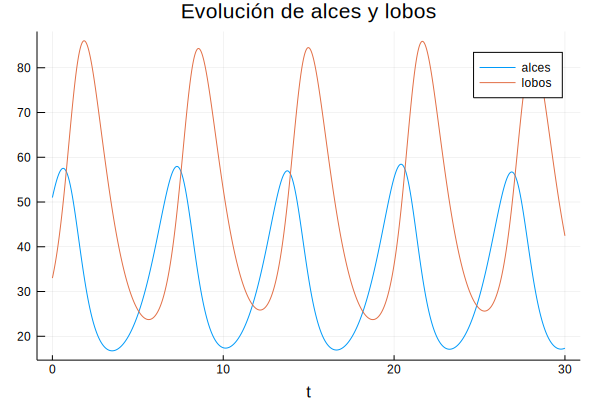

In [4]:
tt = res[:,1]
vv = res[:,2]
ww = res[:,3]

plot(tt,[vv, ww],title="Evolución de alces y lobos",xlabel="t",label=["alces" "lobos"])

<a href="#top">Back to the top</a>

## 2-Error de los métodos de Euler y Euler mejorado
** Estudio experimental del error de los métodos de Euler y Euler mejorado para un modelo simplificado de robot móvil**

### Problema Robot Móvil

Consideremos el problema de determinar la evolución de la posición y la orientación de una plataforma móvil (un robot) que se mueve en una superficie plana horizontal con dos ruedas de radio $R$ situadas en paralelo a una distancia $L$ entre sí, conocidas la evolución de las velocidades angulares $\omega_l(t)$ y $\omega_r(t)$ de la rueda izquierda y la rueda  derecha respectivamente. Dicho problema se puede modelar por medio del siguiente sistema de EDOs

<a id='Edo-Robot'></a>
\begin{equation*}
 \begin{split}
         \frac{d x}{dt} &= \pi \, R\, (\omega_l(t) +\omega_r(t))\,  \cos(\theta), \\ 
      \frac{d y}{dt} &=\pi \, R\, (\omega_l(t) +\omega_r(t))\, \sin(\theta), \\ 
      \frac{d \theta}{dt} &= \frac{2\pi \, R}{L} (\omega_r(t) - \omega_l(t)), 
    \end{split}  \hspace{12em} \tag{3}
\end{equation*}

donde $(x,y)$ son las coordenadas del centro del eje de las ruedas, $\theta$ es el ángulo formado entre el eje que une las dos rueda y el eje horizontal del sistema de coordenadas cartesianas adoptado para el plano sobre el que se mueve el robot. Consideraremos el metro como unidad de longitud, y el segundo como unidad de tiempo.

A lo largo de este ejercicio consideraremos el caso en que 

<a id='Fun-Robot'></a>
\begin{equation*}
\begin{split}
L&=0.5\, \mathrm{m}, \quad R=0.05\, \mathrm{m}, \\
\omega_l(t) &= \frac{3}{5} \sin(\pi t/125) -\frac{1}{200}, \quad 
\omega_r(t) = \frac{3}{5}\sin(\pi t/125) +\frac{1}{200},
\end{split}
\tag{4}
\end{equation*}

y el robot se sitúa inicialmente en el origen de coordenadas, orientado horizontalmente, es decir, 

<a id='Ini-Robot'></a>
\begin{equation*}
x(0) = 0, \quad y(0)=0, \quad \theta(0)=0. \hspace{16em} \tag{5}
\end{equation*}

El problema [(3)](#Edo-Robot)-[(4)](#Fun-Robot) tiene  una única solución $u(t)=(x(t),y(t),\theta(t))$.

Nuestro objetivo es estudiar el error que cometemos al aproximar las solución $u(t)=(x(t),y(t),\theta(t))$ en el intervalo temporal $t \in [0,1000]$ por medio del método de Euler mejorado y compararlo con el método de Euler.

### 2.1- Ejercicio

- **Aproximar la solucion $u(t)=(x(t),y(t),\theta(t))$  para los valores de $t$ de la discretización temporal 
\begin{equation*}
t_0=0,\ t_1=h,\ t_2=2h,\ldots,\ t_{99}=990,\ t_{100}=1000,
\end{equation*}
donde $h=10$.**

In [5]:
function fRobot(t,u,p)
    L = p[1]
    R = p[2]
    x = u[1]
    y = u[2]      
    theta = u[3]
    vl = (3/5*sin(pi/125*t) - 1/200)
    vr = (3/5*sin(pi/125*t) + 1/200)
    dx =  pi*R*(vl+vr)*cos(theta)
    dy =  pi*R*(vl+vr)*sin(theta)
    dtheta = 2*pi*R*(vr-vl)/L       
    return [dx,dy,dtheta]
end

fRobot (generic function with 1 method)

In [6]:
L = 0.5
R = 0.05
p = [L,R]
u0 = [0.,0.,0.]

T = 1000
n=100

res = EulerMejorado(u0,0.,T,n,fRobot,p)

101×4 Array{Float64,2}:
    0.0   0.0           0.0          0.0      
   10.0   0.236131      0.00742072   0.0628319
   20.0   0.92695       0.0727223    0.125664 
   30.0   2.02126       0.246044     0.188496 
   40.0   3.43866       0.562871     0.251327 
   50.0   5.0765        1.03871      0.314159 
   60.0   6.81861       1.6659       0.376991 
   70.0   8.54512       2.41303      0.439823 
   80.0  10.1424        3.2269       0.502655 
   90.0  11.5123        4.03705      0.565487 
  100.0  12.5795        4.76233      0.628319 
  110.0  13.2971        5.3189       0.69115  
  120.0  13.6487        5.6289       0.753982 
    ⋮                                         
  890.0  13.2971       -5.3189       5.59203  
  900.0  12.5795       -4.76233      5.65487  
  910.0  11.5123       -4.03705      5.7177   
  920.0  10.1424       -3.2269       5.78053  
  930.0   8.54512      -2.41303      5.84336  
  940.0   6.81861      -1.6659       5.90619  
  950.0   5.0765       -1.03871     

> **Comprobación**
>
>Las primeros filas de resultados debería coincidir con lo siguientes 
 
                0.0   0.0           0.0          0.0      
               10.0   0.236131      0.00742072   0.0628319
               20.0   0.92695       0.0727223    0.125664 
               30.0   2.02126       0.246044     0.188496 
               40.0   3.43866       0.562871     0.251327 
               50.0   5.0765        1.03871      0.314159 
               60.0   6.81861       1.6659       0.376991 
               70.0   8.54512       2.41303      0.439823 
               80.0  10.1424        3.2269       0.502655 
               90.0  11.5123        4.03705      0.565487 
              100.0  12.5795        4.76233      0.628319 
              110.0  13.2971        5.3189       0.69115  
              120.0  13.6487        5.6289       0.753982 


- **Representar en una misma figura la evolución de las funciones $x(t)$, $y(t)$, y $\theta(t)$ respecto del tiempo en el intervalo temporal $t \in [0,1000]$.**

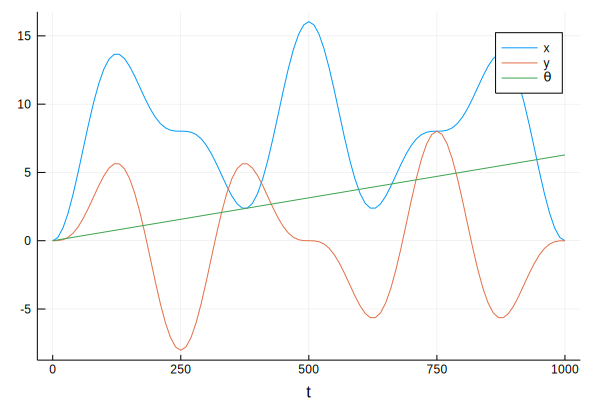

In [7]:
tt = res[:,1]
xx = res[:,2]
yy = res[:,3]
thetas = res[:,4]
plot(tt,[xx, yy,thetas], xlabel="t",label=["x" "y" "\\theta"])

### 2.2- Ejercicio

- **Representar en una figura la trayectoria descrita por el centro del eje de las ruedas en el plano xy**

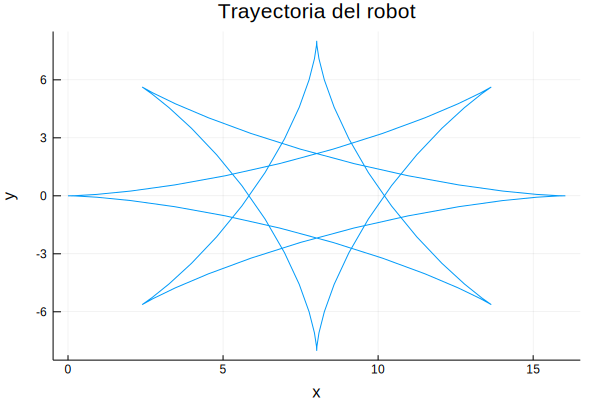

In [8]:
plot(xx,yy,title="Trayectoria del robot", xlabel="x",ylabel="y",label="")

> **Comprobación**
>
>Debería obtenerse una figura en forma de estrella de 8 puntas (que es la trayectoria que sigue la plataforma móvil). 



<a href="#top">Back to the top</a>

### 2.3- Ejercicio


- **Se puede comprobar que en el caso considerado en que $L$, $R$, $\omega_l(t)$, y $\theta_r(t)$ están dados por [(4)](#Fun-Robot), la solución del problema [(3)](#Edo-Robot)-[(5)](#Ini-Robot)  es exáctamente**


\begin{align*}
x(t) &= 8-5 \cos \left(\frac{3 \pi 
   t}{500}\right)-3 \cos
   \left(\frac{\pi  t}{100}\right), \\
   y(t) &= 5 \sin \left(\frac{3 \pi 
   t}{500}\right)-3 \sin
   \left(\frac{\pi  t}{100}\right), \\
   \theta(t) &= \frac{\pi}{500} t.
\end{align*}


Ello nos permite calcular el error cometido al aproximar la solución exacta  $u(t)=(x(t),y(t),\theta(t))$ en $t=t_k$ (para $k=1,2\ldots,n$) por los valores $u_k=(x_k,y_k,\theta_k)$ obtenidos en el apartado anterior (con $n=100$) por medio del método de Euler mejorado. Calcularemos para cada $k=1,2\ldots,n$ el error cometido

<a id='Error'></a>
\begin{equation*}
e(t_k)=||u_k -u(t_k)|| = \sqrt{(x_k-x(t_k))^2+(y_k-y(t_k))^2+(\theta_k-\theta(t_k))^2},
\hspace{4em} \tag{6}
\end{equation*}


y representaremos dicho error respecto de los tiempos $t_k$. 

In [27]:
function RobotSol(t)
    theta = π*t/500
    c3 = cos(3*theta)
    s3 = sin(3*theta)
    c5 = cos(5*theta)
    s5 = sin(5*theta)
    x = 8 - 5 * c3 - 3 * c5
    y = 5 * s3 - 3 * s5
    return [x, y, theta]
end

function errorEM(n)   
    L = 0.5
    R = 0.05
    p = [L,R]
    u0 = [0.,0.,0.]
    T = 1000
    res = EulerMejorado(u0,0.,T,n,fRobot,p)
    tt = res[:,1]
    xyzEM = res[:,2:4]
    errors = similar(tt)
    for j in 1:(n+1)
       errors[j] = norm(res[j,2:4]-RobotSol(tt[j]))
    end
    return (tt,errors)
end


errorEM (generic function with 1 method)

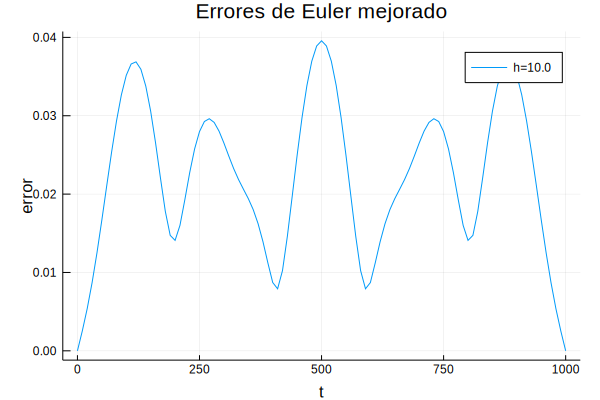

In [28]:
n=100
h = T/n
(tt, erroresEM) = errorEM(n)
plot(tt,erroresEM,
     title="Errores de Euler mejorado",
     xlabel="t",ylabel="error", label=string("h=",h))

### 2.4- Ejercicio

- **Para observar como disminuye el error [(6)](#Error) al considerar discretizaciones cada vez más finas, representar en una misma figura las gráficas de los errores cometidos al aplicar el método de Euler mejorado con $n=100$, $n=200$, y $n=400$.**

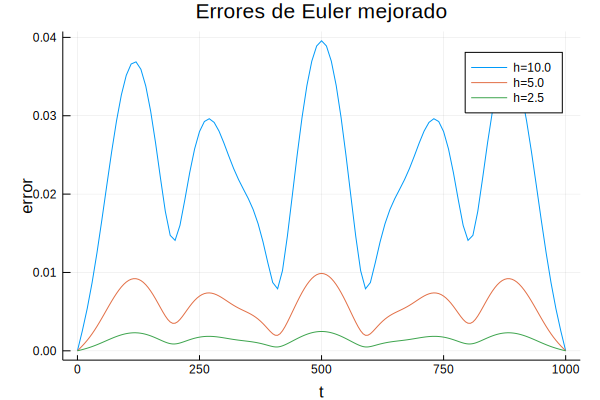

In [29]:
n2=200
h2 = T/n2
(tt2, erroresEM2) = errorEM(n2)
plot!(tt2,erroresEM2, label=string("h=",h2))

n3=400
h3 = T/n3
(tt3, erroresEM3) = errorEM(n3)
plot!(tt3,erroresEM3, label=string("h=",h3))

### 2.5- Ejercicio

- **Representar ahora en una misma figura  las gráficas de dichos errores divididos por $h^2$ (donde $h=1000/n$) para los casos $n=100$, $n=200$, y $n=400$. **

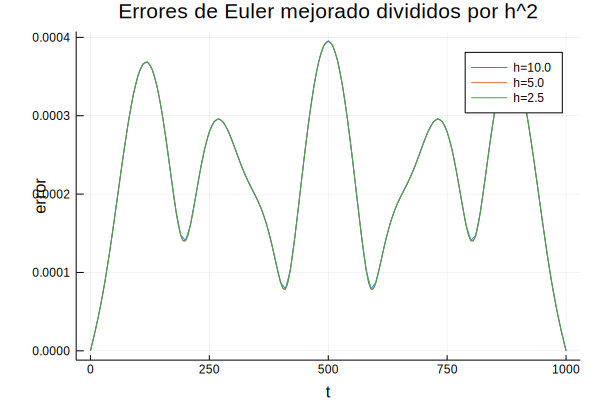

In [30]:
plot(tt,erroresEM/h^2,
     title="Errores de Euler mejorado divididos por h^2",
     xlabel="t",ylabel="error", label=string("h=",h))

plot!(tt2,erroresEM2/h2^2, label=string("h=",h2))

plot!(tt3,erroresEM3/h3^2, label=string("h=",h3))

> **Comprobación**
>
>Las tres gráficas deberían superponerse, lo que indicaría que el error del método de Euler modificado a resultado (como es de esperar por ser un método de segundo orden) es aproximadamente proporcional a $h^2$. 



### 2.6- Ejercicio

- **Repetir el apartado anterior para el método de Euler, pero representando 
respecto a los tiempos $t=t_k$ los errores [(6)](#Error) divididos por $h$. **

In [31]:
"""
Metodo de Euler 
"""
function  Euler(u0, t0, T, n, f, p, m=1)
    h = (T-t0)/(n*m);   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        for i in 1:m
        duj = f(tj, uj, p)
        uj = uj + h * duj
        tj = tj + h
        end
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
                            # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end

function errorE(n)   
    L = 0.5
    R = 0.05
    p = [L,R]
    u0 = [0.,0.,0.]
    T = 1000
    res = Euler(u0,0.,T,n,fRobot,p)
    tt = res[:,1]
    xyzEM = res[:,2:4]
    errors = similar(tt)
    for j in 1:(n+1)
       errors[j] = norm(res[j,2:4]-RobotSol(tt[j]))
    end
    return (tt,errors)
end

errorE (generic function with 1 method)

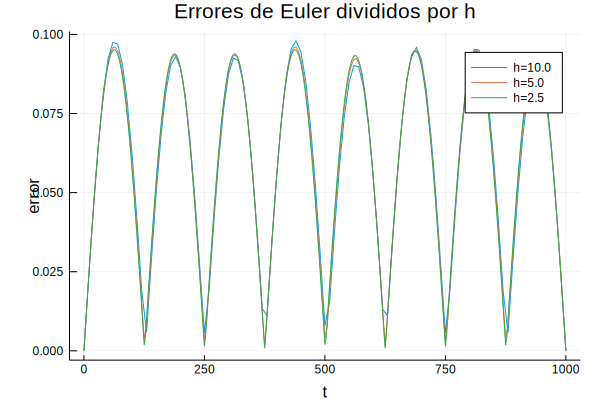

In [32]:
(tt, erroresE) = errorE(n)
plot(tt,erroresE/h,
     title="Errores de Euler divididos por h",
     xlabel="t",ylabel="error", label=string("h=",h))

(tt2, erroresE2) = errorE(n2)
plot!(tt2,erroresE2/h2, label=string("h=",h2))

(tt3, erroresE3) = errorE(n3)
plot!(tt3,erroresE3/h3, label=string("h=",h3))

> **Comprobación**
>
>Las tres gráficas deberían ser muy parecidas, lo que indicaría que el error del método de Euler a resultado (como es de esperar por ser un método de primer orden) es aproximadamente proporcional a $h$. 



### 2.7- Ejercicio

- **En virtud de lo deducido en los dos apartados anteriores, ¿que longitud de paso $h$ deberíamos utilizar respectivamente en el caso del método de Euler y en el caso del método de Euler mejorado  para que el error máximo
$$\displaystyle \max_{1\leq k\leq n} ||u(t_k)-u_k|||$$  fuera menor que $10^{-8}$? (Hay que responder a esta pregunta utilizando sólamente los resultados de los apartados anteriores,  sin volver a aplicar el método correspondiente para valores de $h$ menores).**

> **Respuesta**
>
>En el caso del **método de Euler**, el máximo del error será cada vez menor según vamos tomando valores de h cada vez más pequeños. Denotemos por MaxErrE(h) dicho error máximo como función de la longitud de paso h utilizada al aplicar el método de Euler. 

>Sabemos que MaxErrE(h)/h es aproximadamente constante para h suficientemente pequeño. Según la última figura representada, MaxErrE(h)/h es, en el caso de h=T/200, igual a

In [34]:
C = maximum(erroresE2/h2)

0.09602194959334556

>_Por tanto, para que $\mathrm{MaxErrE}(h) < 10^{-8}$, hará falta que $h \approx \mathrm{MaxErrE}(h)/C < 10^{-8}/C$._

In [35]:
 hEuler = 1e-8/C

1.0414285527788338e-7

>Es decir, en el caso de la aplicación a este problema del método de Euler,  h tiene que ser menor que 1.04142855e-7 para que el error máximo en el intervalo temporal [0,1000] sea menor que 1e-8.

> **Respuesta**
>
>
>_En el caso del **método de Euler mejorado**, el máximo del error será cada vez menor según vamos tomando valores de h cada vez más pequeños. Denotemos por MaxErrEM(h) dicho error máximo como función de la longitud de paso h utilizada al aplicar el método de Euler mejorado. _

>_Sabemos que MaxErrEM(h)/h^2 es aproximadamente constante para h suficientemente pequeño. Según la última figura representada, MaxErrEM(h)/h^2 es, en el caso de h=T/200, igual a_

In [17]:
K = maximum(erroresEM200/h200^2)

UndefVarError: UndefVarError: h200 not defined

>_Por tanto, para que $\mathrm{MaxErrE}(h) < 10^{-8}$, hará falta que $h^2 \approx \mathrm{MaxErrE}(h)/K < 10^{-8}/K$, es decir,_

In [18]:
 hEulerM = sqrt(1e-8/K)

UndefVarError: UndefVarError: K not defined

>Es decir, en el caso de la aplicación a este problema del método de Euler mejorado,  h tiene que ser menor que 0.0050315446 para que el error máximo en el intervalo temporal [0,1000] sea menor que 1e-8.

### 2.8- Ejercicio

 - **¿Qué podemos decir de la eficiencia
 de ambos métodos en este ejemplo, para obtener aproximaciones con errores menores que $10^{-8}$ en el intervalo temporal $[0,1000]$? (Un método es más eficiente que otro si consigue la misma precisión con menos tiempo de cálculo.)**

In [19]:
hEulerM/hEuler

UndefVarError: UndefVarError: hEulerM not defined

> **Respuesta**
> 
> _Hemos visto que para Euler mejorado, basta utilizar longitudes de paso 48314 veces más largas que para Euler, de modo que hará falta dar 48314 veces menos pasos que en Euler. Si se compara la implementación del algoritmo de Euler mejorado con el de Euler, se puede observar que cada paso del método de Euler mejorado costará aproximadamente el doble de tiempo de CPU que cada paso del método de Euler. Por tanto, con el método de Euler mejorado, se podrá obtener aproximaciones con la precisión requerida en un tiempo de CPU 24257 veces menor. Por tanto, resulta en este caso mucho más eficiente que el método de Euler._

<a href="#top">Back to the top</a>

### Valoración

_Incluir aquí los comentarios de valoración de la tarea a entregar (dificultad, interés, etc, incluidas, si se quiere, sugerencias de mejora del ejercicio), así como una estimación del tiempo dedicado al trabajo de la semana (desglosado en el tiempo de estudio de material teórico, tiempo de dedicación a la participación activa o pasiva en los foros, tiempo de implementación y experimentación con los problemas prácticos planteados, y tiempo de preparación del documento jupyter final)._